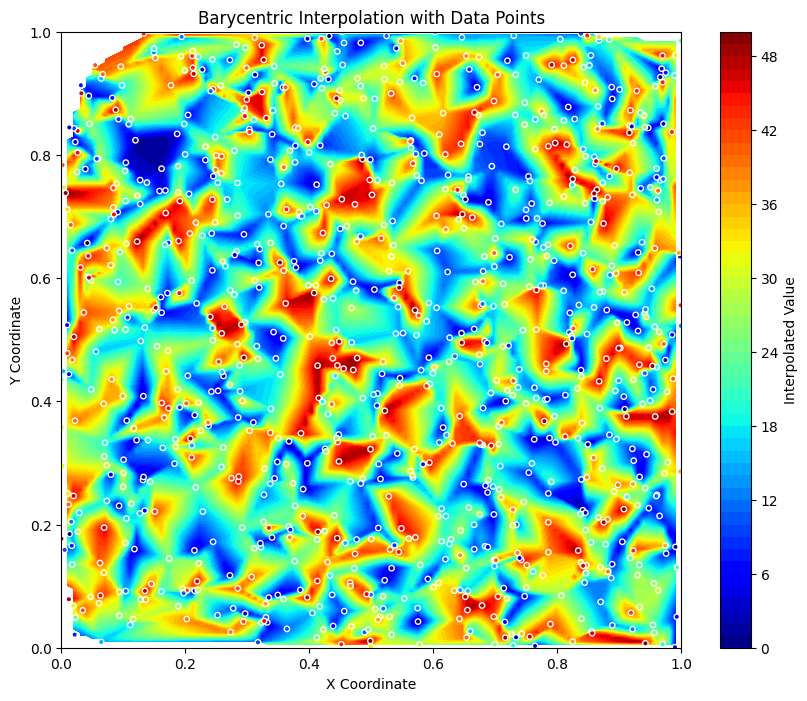

In [3]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def barycentric_interpolate(x, y, tri, values):
    grid_x, grid_y = np.meshgrid(x, y)
    points = np.vstack((grid_x.ravel(), grid_y.ravel())).T
    
    # Determine which simplex each point belongs to
    simplex_indices = tri.find_simplex(points)
    
    # Prepare output array for interpolated values
    interpolated_values = np.full(points.shape[0], np.nan)  # Initialize with NaN
    
    # Calculate barycentric coordinates only for points inside a simplex
    inside = simplex_indices != -1
    if inside.any():
        for i in np.where(inside)[0]:
            simplex = tri.simplices[simplex_indices[i]]
            trans = tri.transform[simplex_indices[i]]
            
            # Calculate barycentric coordinates
            b = trans[:2, :2] @ (points[i] - trans[2])
            bary = np.append(b, 1 - b.sum())  # Append the last barycentric coordinate
            
            # Interpolate the values using barycentric coordinates
            interpolated_values[i] = np.dot(bary, values[simplex])

    return interpolated_values.reshape(grid_x.shape)

# Example usage
np.random.seed(200)
data_points = np.random.rand(1000, 2)  
values = 50 * np.random.rand(1000)     

tri = Delaunay(data_points)          

# Define grid for interpolation
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 200)
interpolated_values = barycentric_interpolate(x, y, tri, values)

# Reshape for plotting
grid_x, grid_y = np.meshgrid(x, y)

# Normalizer for the colormap
norm = Normalize(vmin=values.min(), vmax=values.max())

# Plotting the interpolated results
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_x, grid_y, interpolated_values.reshape(200, 100), levels=50, cmap='jet')
plt.colorbar(contour, label='Interpolated Value')

plt.scatter(data_points[:, 0], data_points[:, 1], c=values, cmap='jet', norm=norm, edgecolor='white', s=15)


plt.title('Barycentric Interpolation with Data Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()